In [16]:
import os, re 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
def get_results_dir(model_name, dataset_name, model_type, fault_type):
    d = {
        'vgg16': {
            'cifar10': {
                'full': {
                    'faults': './logs/vgg16/cifar10/faults',
                    'zero_bit_masking':  './logs/vgg16/cifar10/zero_bit_masking',
                    'faults_param': './logs/vgg16/cifar10/faults_param',
                },
                'prune': {
                    'faults': './logs/vgg16/cifar10/prune/scratchB/faults',
                    'zero_bit_masking': './logs/vgg16/cifar10/prune/scratchB/zero_bit_masking',
                    'faults_param_mimic': './logs/vgg16/cifar10/prune/scratchB/faults_param_mimic',
                },
                'pruneB': {
                    'faults': './logs/vgg16/cifar10/pruneB/scratchB/faults',
                    'zero_bit_masking': './logs/vgg16/cifar10/pruneB/scratchB/zero_bit_masking',
                    'faults_param_mimic': './logs/vgg16/cifar10/pruneB/scratchB/faults_param_mimic',
                }
            }
        },
         'resnet56': {
            'cifar10': {
                'full': {
                    'faults': './logs/resnet56/cifar10/faults',
                    'zero_bit_masking':  './logs/resnet56/cifar10/zero_bit_masking',
                },
                'pruneA': {
                    'faults': './logs/resnet56/cifar10/pruneA/scratchB/faults',
                    'zero_bit_masking': './logs/resnet56/cifar10/pruneA/scratchB/zero_bit_masking',
                },
                'pruneB': {
                    'faults': './logs/resnet56/cifar10/pruneB/scratchB/faults',
                    'zero_bit_masking': './logs/resnet56/cifar10/pruneB/scratchB/zero_bit_masking',
                }
                
            }
        }
        
    }
    return d.get(model_name).get(dataset_name).get(model_type).get(fault_type)


model_name = 'vgg16'
# model_name = 'resnet56'
dataset_name = 'cifar10'

model_types = ['full', 'prune', 'pruneB']
# model_types = ['full', 'pruneA', 'pruneB']
# fault_types = ['faults', 'zero_bit_masking']
# fault_types = ['faults']
fault_types = ['faults_param', 'faults_param_mimic']


In [18]:
def parse_log(log_path):
    # result = {trial_id: [#flipped_bits, #changed_params, test_accuracy]}
    result = {}
    with open(log_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line:
                flipped_bits, changed_params, test_accuracy = 0, 0, None 
                items = line.split(',')
                for item in items:
                    if 'flipped_bits' in item:
                        flipped_bits = int(item.split()[1])
                    if 'changed_params' in item:
                        changed_params = int(item.split()[1])
                    if 'test_accuracy' in item:
                        test_accuracy = float(item.split()[1])
                    if 'trial' in item:
                        trial = int(item.split()[1])
                if test_accuracy:
                    result[trial] = [flipped_bits, changed_params, test_accuracy]
    result = [result[trial_id] for trial_id in sorted(result.keys())]
    return result 

def load_results(model_type, fault_type):
    # results = {fault_rate: trial_id: [#flipped bits, # changed_params, test_accuracy]}
    results = {}
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    if not results_dir:
        return None 
    fault_rates_folders = os.listdir(results_dir)
    for folder in fault_rates_folders:
        # each folder has a log.txt file and a folder that contains the stats
        log_path = os.path.join(results_dir, folder, 'logs.txt')
        log_result = parse_log(log_path)
        fault_rate = float(folder)
        results[fault_rate] = log_result
#         print(fault_rate, log_result)
    return results 

data = {} # model_type -> fault_type -> fault_rate -> trial_id 
for model_type in model_types:
    data[model_type] = {} 
    for fault_type in fault_types:
        results = load_results(model_type, fault_type)
        if results:
            data[model_type][fault_type] = results 

fault_rate = 5e-8 
for model_type in model_types:
    for fault_type in fault_types:
        if model_type in data and fault_type in data[model_type]:
            print(model_type,',', fault_type,',', fault_rate,',', data.get(model_type).get(fault_type).get(fault_rate))
# print('full, faults:', data['full']['faults'][5e-8])
# print('prune, faults:', data['pruneA']['faults'][5e-8])

# print('full, zero_bit_masking:', data['full']['zero_bit_masking'][5e-8])
# print('prune, zero_bit_masking:', data['pruneA']['zero_bit_masking'][5e-8])

full , faults_param , 5e-08 , [[1, 1, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [3, 3, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [0, 0, 0.9388], [1, 1, 0.9389], [0, 0, 0.9388], [0, 0, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [2, 2, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [2, 2, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [2, 2, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [0, 0, 0.9388], [2, 2, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [3, 3, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [0, 0, 0.9388], [0, 0, 0.9388], [2, 2, 0.1033], [0, 0, 0.9388], [2, 2, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [2, 2, 0.9388], [0, 0, 0.9388], [2, 2, 0.9381], [0, 0, 0.9388], [0, 0, 0.9388], [2, 2, 0.938], [1, 1, 0.9388], [0, 0, 0.9388], [0, 0, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388], [1, 1, 0.9388]]
prune , faults_param_mimic , 5e-08 , [[1, 1, 0.9395], [0, 0, 0.9395], [1, 1, 0.9395], [3, 3, 0.9395], [1, 1, 0.9395], [1, 1, 0.9395], [0, 0, 0.9395], [1, 1, 0.9396], [0, 

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 50, 3)
full: [0.9388   0.922062 0.92208  0.847262 0.782816 0.447076 0.17335  0.098928
 0.099156]
prune: [0.9395   0.90468  0.919288 0.8264   0.74398  0.28357  0.133888 0.1
 0.100018]


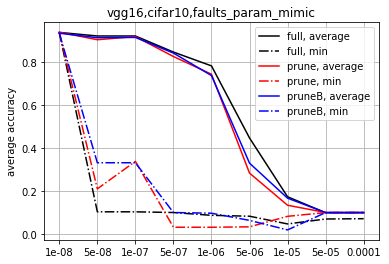

In [19]:
# compare full faults and prune faults results
# for fault_type in fault_types:
common_fault_rates = sorted(set(data['full']['faults_param'].keys()).intersection(data['prune']['faults_param_mimic'].keys()))
print('common_fault_rates', len(common_fault_rates), common_fault_rates)

# get the accuracy results
faults_results_list = [] 
for model_type in model_types:
    if model_type == 'full':
        fault_type = 'faults_param'
    else:
        fault_type = 'faults_param_mimic'
        
    faults_results =  data[model_type][fault_type]
    faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
faults_results_list = np.asarray(faults_results_list)
print('faults_results_list.shape:', faults_results_list.shape)


averaged = np.average(faults_results_list, axis=2)
mins = np.min(faults_results_list, axis=2)
maxs = np.max(faults_results_list, axis=2)
print('full:', averaged[0, :, 2])
print('prune:', averaged[1, :, 2])

x = range(len(common_fault_rates))
colors = ['k', 'r', 'b']
linestyles = ['-', '--', '-.']
for i, model_type in enumerate(model_types):
    plt.plot(x, averaged[i, :, 2], linestyle=linestyles[0], color=colors[i], label=model_type+', average')
    # plt.plot(x, maxs[i, :, 2],  linestyle=linestyles[1], color=colors[i], label=model_type + ', max')
    plt.plot(x, mins[i, :, 2], linestyle=linestyles[2], color = colors[i], label=model_type +', min')

plt.legend()
plt.xticks(x, map(str, common_fault_rates))
plt.grid()
plt.ylabel('average accuracy')
plt.title(model_name+','+dataset_name+','+fault_type)
plt.show()


common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 50, 3)


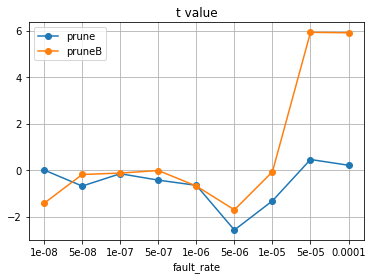

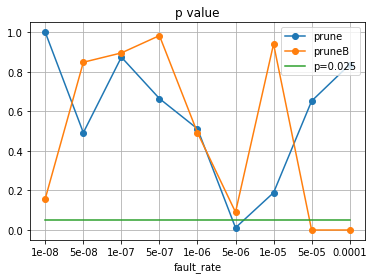

In [27]:
# significance test 
from scipy import stats 
common_fault_rates = sorted(set(data['full']['faults_param'].keys()).intersection(data['prune']['faults_param_mimic'].keys()))
print('common_fault_rates', len(common_fault_rates), common_fault_rates)

# get the accuracy results
faults_results_list = [] 
for model_type in model_types:
    if model_type == 'full':
        fault_type = 'faults_param'
    else:
        fault_type = 'faults_param_mimic'
        
    faults_results =  data[model_type][fault_type]
    faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
faults_results_list = np.asarray(faults_results_list)
print('faults_results_list.shape:', faults_results_list.shape)

def get_fault_free_accuracy(model_name, dataset_name, model_type):
    d = {'vgg16': {
        'cifar10': {
            'full': 0.9388, 
            'prune': 0.9395, 
            'pruneB': 0.935}},
        'resnet56': {
            'cifar10':{
                'full': 0.9269, 
                'pruneA': 0.9331, 
                'pruneB': 0.9339, 
                'pruneC': 0.9308, 
                'pruneD': 0.9306}}
        }
    return d[model_name][dataset_name][model_type]
# null hypothesis: pruned model has the same expected accuracy drop compared with the original model 
p_value_list = [] 
t_value_list = [] 
for i in range(1, len(model_types)):
    model_type = model_types[i]
    pruned_fault_free_accuracy = get_fault_free_accuracy(model_name, dataset_name, model_type)
    full_fault_free_accuracy = get_fault_free_accuracy(model_name, dataset_name, 'full')
    p_values = [] # p_value for different fault_rate
    t_values = [] 
    for j in range(len(common_fault_rates)):
        pruned_accuracy_drops =  pruned_fault_free_accuracy - faults_results_list[i, j, :, 2] # prune
        full_accuracy_drops = full_fault_free_accuracy - faults_results_list[0, j, :, 2] # full
        score = stats.ttest_ind(full_accuracy_drops, pruned_accuracy_drops, equal_var = False)
        t_value, p_value = score[0], score[1]
        if np.isnan(t_value):
            t_value, p_value = 0, 1 
#         print(t_value, p_value)
        p_values.append(p_value)
        t_values.append(t_value)
    p_value_list.append(p_values) 
    t_value_list.append(t_values) 

# plot t_value and p_value 
x = range(len(common_fault_rates))
for i in range(len(p_value_list)):
    plt.plot(x, t_value_list[i], 'o-', label = model_types[i+1])
plt.legend()
plt.xlabel('fault_rate')
plt.title('t value')
plt.grid()
plt.xticks(x, map(str, common_fault_rates))
plt.show()

for i in range(len(p_value_list)):
    plt.plot(x, p_value_list[i], 'o-', label = model_types[i+1])
plt.plot(x, [0.05]*len(common_fault_rates), label='p=0.025')
plt.legend()
plt.xlabel('fault_rate')
plt.title('p value')
plt.xticks(x, map(str, common_fault_rates))
plt.grid()
plt.show()

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 50, 3)


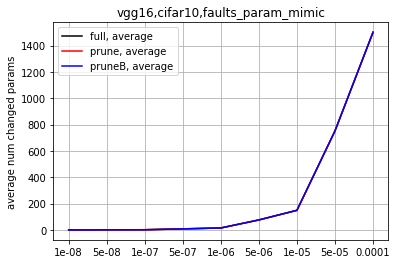

In [14]:
# compare full faults and prune faults results: #params changed 
# for fault_type in fault_types:
common_fault_rates = sorted(set(data['full']['faults_param'].keys()).intersection(data['prune']['faults_param_mimic'].keys()))
print('common_fault_rates', len(common_fault_rates), common_fault_rates)

# get the accuracy results
faults_results_list = [] 
for model_type in model_types:
    if model_type == 'full':
        fault_type = 'faults_param'
    else:
        fault_type = 'faults_param_mimic'
        
    faults_results =  data[model_type][fault_type]
    faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
faults_results_list = np.asarray(faults_results_list)
print('faults_results_list.shape:', faults_results_list.shape)


averaged = np.average(faults_results_list, axis=2)
x = range(len(common_fault_rates))
colors = ['k', 'r', 'b']
linestyles = ['-', '--', '-.']
for i, model_type in enumerate(model_types):
    plt.plot(x, averaged[i, :, 1], linestyle=linestyles[0], color=colors[i], label=model_type+', average')

plt.legend()
plt.xticks(x, map(str, common_fault_rates))
plt.grid()
plt.ylabel('average num changed params')
plt.title(model_name+','+dataset_name+','+fault_type)
plt.show()

faults_results_list.shape: (1, 50, 3)


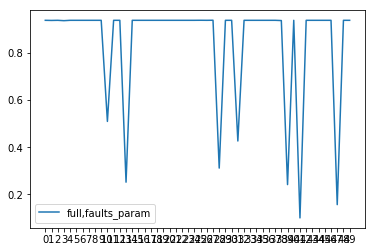

[(27, array([6.    , 6.    , 0.9391]))]
[(41, array([5. , 5. , 0.1]))]
faults_results_list.shape: (1, 50, 3)


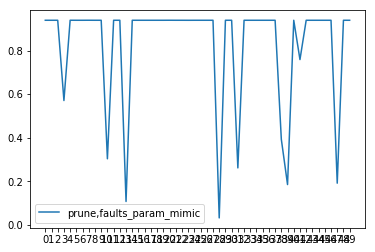

[(4, array([5.    , 5.    , 0.9396]))]
[(28, array([12.    , 12.    ,  0.0314]))]
faults_results_list.shape: (1, 50, 3)


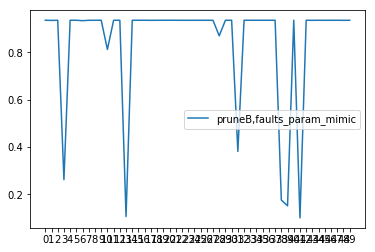

[(4, array([5.    , 5.    , 0.9351]))]
[(41, array([5. , 5. , 0.1]))]


In [6]:
# analyze bad model and good model using fault_rate=1e-08
fault_rate = 5e-07

# model_types = ['full', 'prune']
# fault_types = ['faults', 'zero_bit_masking']
example_trial_ids = {}

for model_type in model_types:

    faults_results_list = []
    legends = [] 
#     for fault_type in fault_types:
    if model_type == 'full':
        fault_type = 'faults_param'
    else:
        fault_type = 'faults_param_mimic'
        
    faults_results_list.append(data[model_type][fault_type][fault_rate])
    legends.append(model_type+','+fault_type)
        
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)
    num_trials = faults_results_list.shape[1]
    
#     for i, model_type in enumerate(model_types):
    plt.plot(range(num_trials), faults_results_list[0, :, 2])
    plt.legend(legends)
    plt.xticks(range(num_trials), map(str, range(num_trials)))
    plt.show()

    # get the bad and good trial ids  
    example_trial_ids[model_type] = {'good': [np.argmax(faults_results_list[0, :, 2])],
                                    'bad': [np.argmin(faults_results_list[0, :, 2])]}

    print([(i, faults_results_list[0, i]) for i in example_trial_ids[model_type]['good']])
    print([(i, faults_results_list[0, i]) for i in example_trial_ids[model_type]['bad']])

In [7]:
import pickle 
def load_pickle(load_path, load_name=None, verbose=False):
    if load_name:
        filepath =  os.path.join(load_path, load_name)
    else:
        filepath = load_path 
    if verbose:
        print('Load pickle file:', filepath)
    return pickle.load( open(filepath, "rb" ))

def parse_stats(stats):
    # input format:
    # stats = {param_name: {value: [(flipped bit position, bit value after flip, value after flip)]}}
    # output format: 
    # param_name: #values changed,  #0 -> 1 bit flips, # 1-> 0 bit flips 
    param_stats = {} # key=param_name, value =dictionary
    for param_name, param_dict in stats.items():

        param_stats[param_name] = {'changed_params':0, 
                                   'flip_to_one': np.zeros(32), 
                                   'flip_to_zero': np.zeros(32),
                                  'value_before_flip': [],
                                  'value_after_flip':[], 
                                  'flipped_positions': []}
            
        for value_id, flip_list in param_dict.items():
            param_stats[param_name]['changed_params'] += 1
            param_stats[param_name]['value_before_flip'].append(round(flip_list[0][0], 6))
            param_stats[param_name]['value_after_flip'].append(round(flip_list[-1][-1], 6))
            param_stats[param_name]['flipped_positions'].append([x[1] for x in flip_list])
            
            for _, flip_pos, flip_bit, flip_value in flip_list:
                if flip_bit:
                    param_stats[param_name]['flip_to_one'][flip_pos] += 1
                else:
                    param_stats[param_name]['flip_to_zero'][flip_pos] += 1
    return param_stats 

def trial_id_to_stats_files(trial_id):
    return str(trial_id)+'.pkl' 

def load_and_average_stats(results_dir, fault_rate, trial_ids):
    folder = str(fault_rate)
    stat_dir = os.path.join(results_dir, folder, 'stats')
    stats_files = map(trial_id_to_stats_files, trial_ids)
    avg_param_stats = None 
    for f in stats_files:
        # each trial is saved as a pickle 
        stats = load_pickle(stat_dir, f)
#         print stats
#         return 
        param_stats = parse_stats(stats)
        if avg_param_stats:
            for param_name, param_dict in param_stats.items():
                if param_name not in avg_param_stats:
                    avg_param_stats[param_name] = param_dict 
                else:
                    for key, value in param_dict.items():
                        avg_param_stats[param_name][key] += value 
        else:
            avg_param_stats = param_stats
    return avg_param_stats
                    

Number of variables changed: 3
Number of values changed: 5


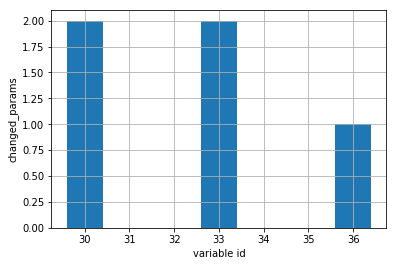

changed variables: [(30, (512, 512, 3, 3)), (33, (512, 512, 3, 3)), (36, (512, 512, 3, 3))]

fault_type:faults_param
(30, (512, 512, 3, 3)) [(1.8e-05, 1.8e-05, [23]), (-0.002557, -0.0, [2])]
(33, (512, 512, 3, 3)) [(0.003842, 0.003597, [11]), (0.000821, 0.000821, [23])]
(36, (512, 512, 3, 3)) [(0.002972, 1.0111539400935619e+36, [1])]


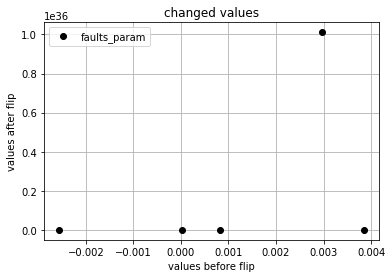

In [8]:
import functools 

model_type = 'full'
fault_type = 'faults_param'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])
print('Number of variables changed:', len(variables))
print('Number of values changed:', sum([avg_params_stats[var]['changed_params'] for var in variables]))
# for layer_id in range(len(variables)//3):
#     print('conv/FC-%d: %s' %(layer_id, variables[layer_id*3:(layer_id+1)*3]))


plt.bar([v[0] for v in variables], [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()

changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['k', 'r', 'b', 'g']
markers = ['o', '*']

print('\nfault_type:%s' %(fault_type))
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

for var in changed_vars:
    print(var, 
          list(zip(avg_params_stats[var]['value_before_flip'], 
           avg_params_stats[var]['value_after_flip'], 
           avg_params_stats[var]['flipped_positions'])))

values_before = functools.reduce(lambda x, y: x+y, 
                                 [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
values_after = functools.reduce(lambda x, y: x+y, 
                                 [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
plt.plot(values_before, values_after, linestyle='', color=colors[0], marker=markers[0])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.legend(fault_types)
plt.grid()
plt.show()

Number of variables changed: 7
Number of values changed: 12


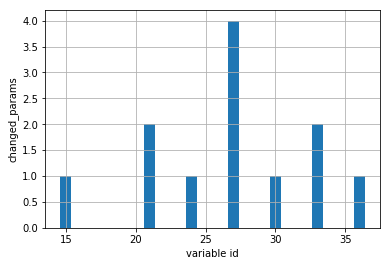

changed variables: [(15, (256, 256, 3, 3)), (21, (256, 256, 3, 3)), (24, (256, 256, 3, 3)), (27, (256, 256, 3, 3)), (30, (256, 256, 3, 3)), (33, (256, 256, 3, 3)), (36, (256, 256, 3, 3))]

fault_type:faults_param_mimic
(15, (256, 256, 3, 3)) [(-0.010892, 0.010892, [0])]
(21, (256, 256, 3, 3)) [(0.000353, 0.000323, [11]), (0.022334, 0.021846, [13])]
(24, (256, 256, 3, 3)) [(-0.009445, -0.008469, [11])]
(27, (256, 256, 3, 3)) [(0.000364, 0.000356, [13]), (-0.004129, -0.000258, [6]), (0.038904, 1.3238499881134476e+37, [1]), (0.00041, 0.00041, [21])]
(30, (256, 256, 3, 3)) [(-0.00407, -0.004069, [21])]
(33, (256, 256, 3, 3)) [(0.009432, 0.00931, [14]), (-0.000554, -0.0, [3])]
(36, (256, 256, 3, 3)) [(0.003352, 0.003345, [16])]


IndexError: list index out of range

In [9]:
model_type = 'prune'
fault_type = 'faults_param_mimic'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])
print('Number of variables changed:', len(variables))
print('Number of values changed:', sum([avg_params_stats[var]['changed_params'] for var in variables]))
# for layer_id in range(len(variables)//3):
#     print('conv/FC-%d: %s' %(layer_id, variables[layer_id*3:(layer_id+1)*3]))


plt.bar([v[0] for v in variables], [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()

changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['r', 'b']
markers = ['o', '*']

print('\nfault_type:%s' %(fault_type))
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

for var in changed_vars:
    print(var, 
          list(zip(avg_params_stats[var]['value_before_flip'], 
           avg_params_stats[var]['value_after_flip'], 
           avg_params_stats[var]['flipped_positions'])))

values_before = functools.reduce(lambda x, y: x+y, 
                                 [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
values_after = functools.reduce(lambda x, y: x+y, 
                                 [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
plt.plot(values_before, values_after, linestyle='', color=colors[i], marker=markers[i])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.legend(fault_types)
plt.grid()
plt.show()